In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import seaborn as sns
from keras.datasets import mnist
from keras import models
from keras.utils import to_categorical
import cv2
import copy
from skimage.transform import resize
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
keras.__version__

'2.11.0'

In [2]:
# Load training set
tr=pd.read_csv("D:\\Bachelor\\Machine-Learning\\datasets\\emnist-digits-train.csv",header=None)
tr

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
tr_1=tr.drop(tr.columns[[0]],axis=1)
print(tr_1)

        1    2    3    4    5    6    7    8    9    10   ...  775  776  777  \
0         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
239995    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239996    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239997    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239998    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239999    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

        778  779  780  781  782  783  7

In [4]:
tr_1=np.array(tr_1)
tr_2 = tr_1.reshape(tr_1.shape[0], 28, 28,1)
tr_2.shape

(240000, 28, 28, 1)

In [5]:
y_train=tr.iloc[:,0]
print(y_train)

0         8
1         9
2         6
3         3
4         6
         ..
239995    4
239996    2
239997    1
239998    1
239999    0
Name: 0, Length: 240000, dtype: int64


In [6]:
# Splitting the data to training and test set
x_train, x_test, y_train, y_test = train_test_split(tr_2, y_train, test_size=0.3,random_state=0)

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


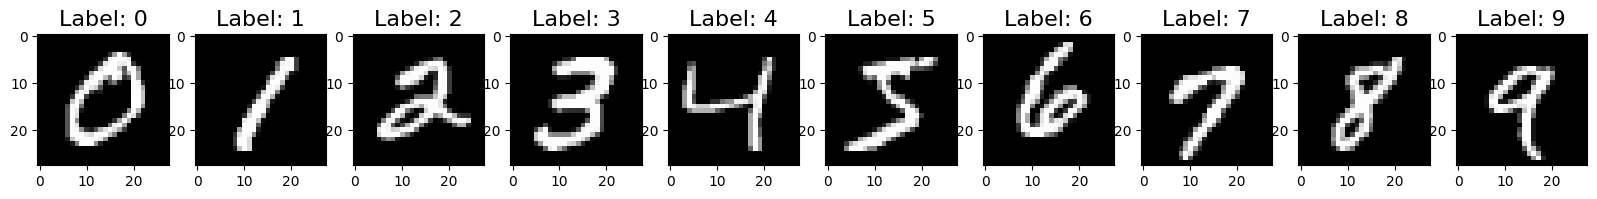

In [9]:
# Specify the labels and the number of classes
numberOFclasses = 10
f, ax = plt.subplots(1, numberOFclasses, figsize=(20,20))

for i in range(0, numberOFclasses):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

In [10]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, numberOFclasses)
y_test = keras.utils.to_categorical(y_test, numberOFclasses)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
x_test[0].shape

(28, 28, 1)

In [1]:
# Creating the model
# Adding layers to it 
# Number of filters 32 
    # Kernel size 3 specifies the size of the receptive field
    # Padding same for zero padding and to "valid" if no padding is used
    # Only the first Conv layer should specify the input shape
 # Pooling size specifies the size of the receptive field
 # Flatten layer collapses the spatial dimensions of the input into the channel dimension
 # Dense layer that is deeply connected with its preceding layer 
 # which means the neurons of the layer are connected to every neuron of its preceding layer
model = keras.Sequential(
    [
      keras.layers.Conv2D(32,(3,3), activation='relu',padding='same', input_shape = (28,28,1)),
      keras.layers.Conv2D(32,(3,3), activation='relu'),
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Conv2D(64,(3,3), activation='relu'),
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Conv2D(64,(3,3), activation='relu'),
      keras.layers.Flatten(),
      #keras.layers.Dense(64,activation = 'relu'),
      keras.layers.Dense(10, activation= 'softmax')
    ]
)

NameError: name 'keras' is not defined

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          3

In [14]:
sgd=keras.optimizers.SGD(clipvalue=1.0)
adam=keras.optimizers.Adam(learning_rate=0.01)

model_checkpoint_callback = keras.callbacks.ModelCheckpoint("digits.h5",monitor='val_accuracy',save_best_only=True)
EarlyStopping1=keras.callbacks.EarlyStopping( monitor="val_accuracy",patience=5,restore_best_weights=True)
model.compile(optimizer = adam,loss ='categorical_crossentropy',metrics = ['accuracy'])

In [17]:
# Train the model
history=model.fit(x_train,y_train, epochs=30, batch_size = 64,validation_split=0.1,callbacks=[model_checkpoint_callback,EarlyStopping1])

Epoch 1/30
844/844 [==============================] - 96s 114ms/step - loss: 0.0500 - accuracy: 0.9855 - val_loss: 0.0647 - val_accuracy: 0.9815
Epoch 2/30
844/844 [==============================] - 103s 122ms/step - loss: 0.0588 - accuracy: 0.9839 - val_loss: 0.0565 - val_accuracy: 0.9852
Epoch 3/30
844/844 [==============================] - 154s 182ms/step - loss: 0.0546 - accuracy: 0.9846 - val_loss: 0.0680 - val_accuracy: 0.9827
Epoch 4/30
844/844 [==============================] - 94s 112ms/step - loss: 0.0556 - accuracy: 0.9857 - val_loss: 0.0942 - val_accuracy: 0.9803
Epoch 5/30
844/844 [==============================] - 104s 124ms/step - loss: 0.0561 - accuracy: 0.9849 - val_loss: 0.0544 - val_accuracy: 0.9875
Epoch 6/30
844/844 [==============================] - 82s 98ms/step - loss: 0.0586 - accuracy: 0.9844 - val_loss: 0.0722 - val_accuracy: 0.9848
Epoch 7/30
844/844 [==============================] - 79s 93ms/step - loss: 0.0619 - accuracy: 0.9840 - val_loss: 0.0563 - val_a

In [18]:
model2=keras.models.load_model("digits.h5")

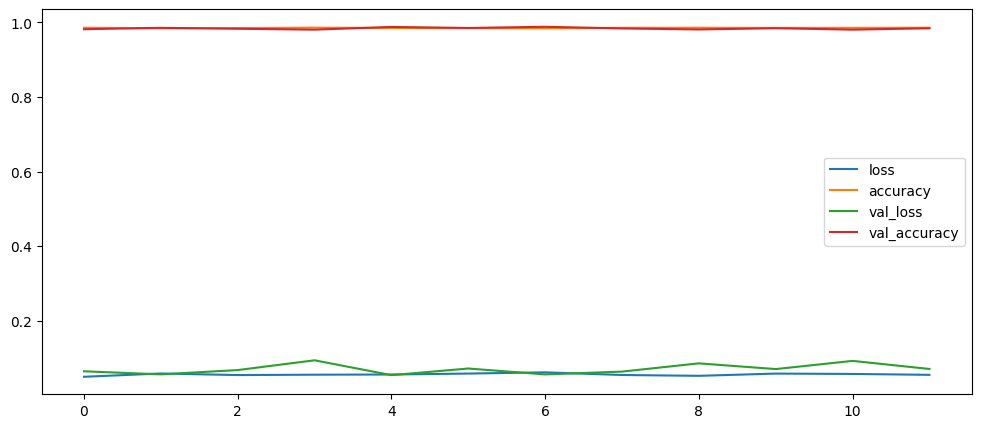

In [19]:
# Creating a learning curve
fig,ax = plt.subplots(figsize=(12,5))
ax=plt.plot(history.history["loss"],label="loss")
ax=plt.plot(history.history["accuracy"],label="accuracy")
ax=plt.plot(history.history["val_loss"],label="val_loss")
ax=plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: {},Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 3s 10ms/step - loss: 0.0590 - accuracy: 0.9854
Loss: 0.05897236242890358,Accuracy: 0.9854000210762024


In [21]:
#model1=keras.models.load_model("digits.h5")

In [22]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

313/313 [==============================] - 7s 9ms/step
[7 2 1 ... 4 5 6]


In [23]:
x_test.shape

(10000, 28, 28, 1)

444


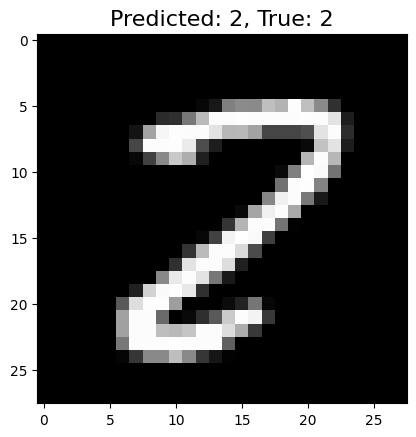

In [24]:
# Getting a random item and check if the prediction is correct
random_idx = np.random.choice(len(x_test))
print(random_idx)
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

(28, 28, 1)


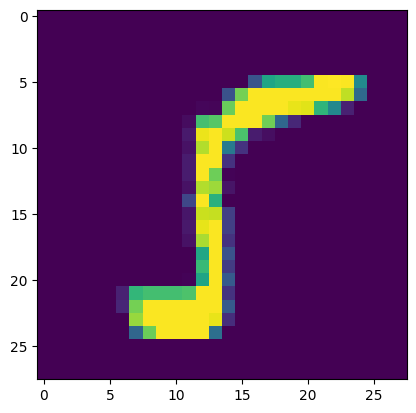

In [25]:
print(x_test[9830].shape)
plt.imshow(x_test[9830])

In [26]:
model1=keras.models.load_model("digits.h5")

In [27]:
img3_1=load_img('D:\\A.my documents\\A.opencv\\A.Python\\MNIST\\sample\\779.jpg', grayscale=True, target_size=(28, 28))
img3=copy.copy(img3_1)

img = img_to_array(img3)

img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')
img = img / 255.0


y_pred1 = model1.predict(img)
y_pred1 = np.argmax(y_pred1, axis=1)
print(y_pred1)
plt.imshow(img3_1, cmap='gray')

c:\Users\narma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\A.my documents\\A.opencv\\A.Python\\MNIST\\sample\\779.jpg'